In [1]:
library("here")
library(devtools)
library(Seurat)

load_all('/home/jpm73279/Socrates')

here() starts at /home/jpm73279/Mendieta_et_al_comparative_single_cell

Loading required package: usethis

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject

ℹ Loading Socrates

Loading required package: cicero

Loading required package: monocle

Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, 

# Files to Be Analyzed (by Plates and Reps)

ZP_P11_G029_10x.unique.tn5.bed  ZP_P2_G029_10x.unique.tn5.bed
ZP_P1_G029_10x.unique.tn5.bed   ZP_P3_G029_10x.unique.tn5.bed

#### First File: ZP_P3_G029_10x.unique.tn5.bed

Mostly checking here to ensure that this even works. Merging Gff3 files is kinda... weird. And since they're a hyper variable file format, you never know what's going to happen.


In [3]:

# bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/00.data/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_proso_repeat/"

Uro_P1.rep1 <- paste0(analysis_path, "ZP_P3_G029_10x.mpq30.unique.tn5.bed")

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"Zm.Pm.merged_annotation.gff3")
chr <- paste0(reference_genome_path,"Zm_Proso.genome_combination.chrom.size")
pre <- "Zm_Proso.Repeat_mpq30"



#Load Object
Uro_P1.leaf.rep1 <- loadBEDandGenomeData(Uro_P1.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_proso_repeat/ZP_P3_G029_10x.mpq30.unique.tn5.bed ... ok

GFF file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/00.data/Zm.Pm.merged_annotation.gff3 ... ok

Chromosome sizes file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/00.data/Zm_Proso.genome_combination.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data



In [4]:
# call ACRs
sb_temp_dir <- paste0(analysis_path, "tmp")
Uro_P1.leaf.rep1.acrs <- callACRs(Uro_P1.leaf.rep1, genomesize=9.6e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

 - running MACS2 on bulk BED file ...



In [14]:
Uro_P1.leaf.rep1.meta <- buildMetaData(Uro_P1.leaf.rep1.acrs,
                                     tss.window=1000,
                                     verbose=TRUE, 
                                     organelle_scaffolds = c("CM009689.1"))

 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...



In [17]:
sum(Uro_P1.leaf.rep1.meta$meta$ptmt)

[1] NA

Making Dotplot



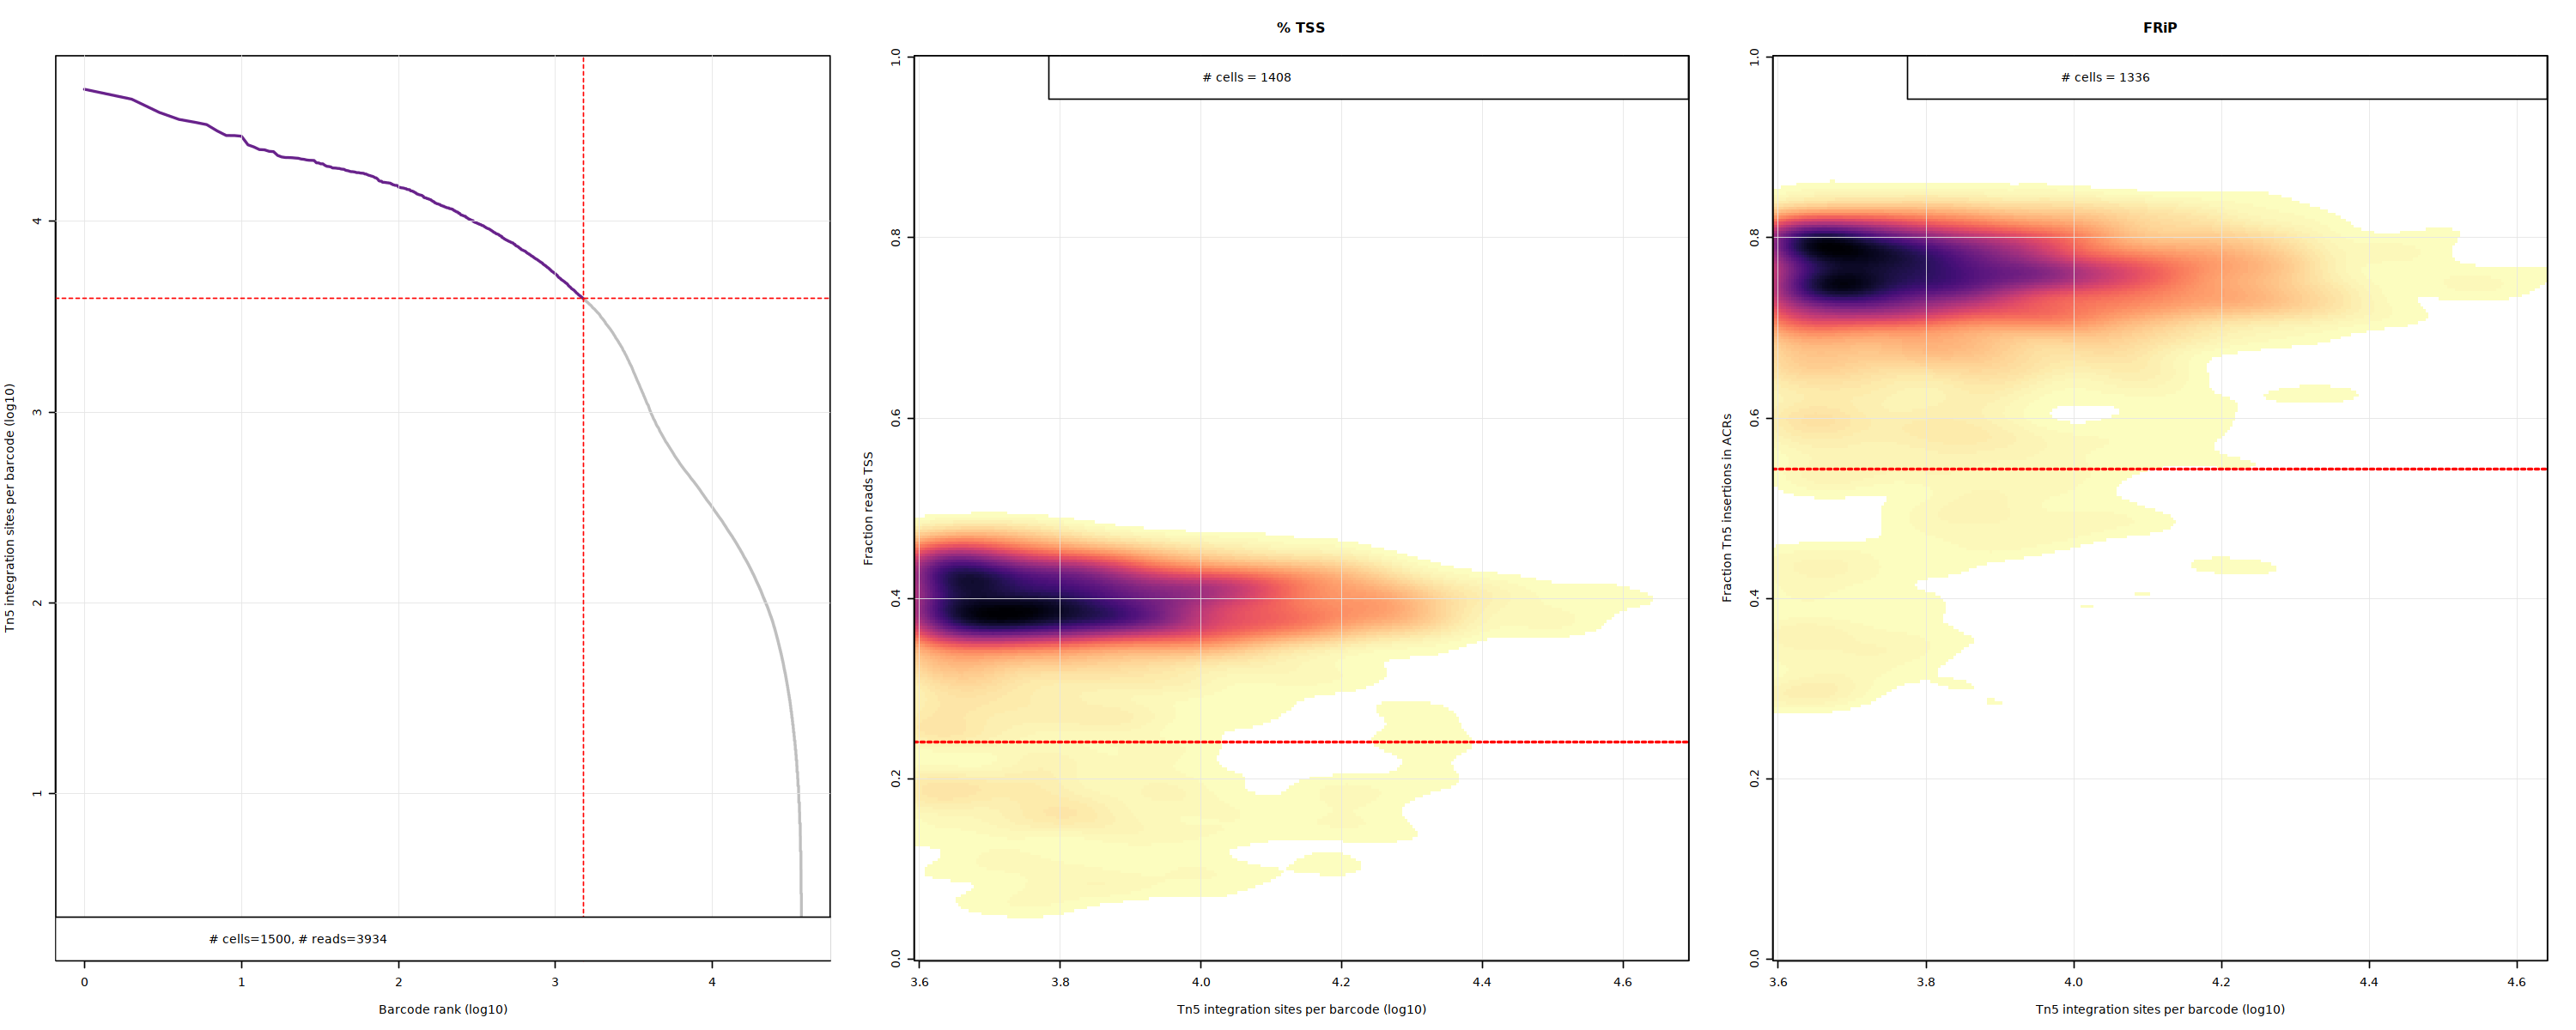

In [9]:
library(repr)

options(repr.plot.width=25, repr.plot.height=10)
Uro_P1.leaf.rep1.meta_file <- findCells(Uro_P1.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=1500,
                                        min.tn5=500,
                                        filt.tss=FALSE,
                                        filt.frip=FALSE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=NULL)


### For Loop Time...

Okay - Looks like the Gff3 file and the genome size from the FrIP score is working. Going ahead and running these plates independently and generating QC metrics.

In [18]:
remaining_files_list <- list("ZP_P11_G029_10x", "ZP_P2_G029_10x", "ZP_P1_G029_10x", "ZP_P3_G029_10x")


for (i in remaining_files_list) {
    
Uro_P1.rep1 <- paste0(analysis_path, paste0(i,".mpq30.unique.tn5.bed"))
ann <- paste0(reference_genome_path,"Zm.Pm.merged_annotation.gff3")
chr <- paste0(reference_genome_path,"Zm_Proso.genome_combination.chrom.size")
pre <- i


output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/Zm_proso_repeat/"
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/Zm_proso_repeat/QC_output/imgs/"
    
#Load Object
Uro_P1.leaf.rep1 <- loadBEDandGenomeData(Uro_P1.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

# call ACRs
sb_temp_dir <- paste0(analysis_path, paste0(pre, "peaks.tmp"))
Uro_P1.leaf.rep1.acrs <- callACRs(Uro_P1.leaf.rep1, genomesize=2.2e9,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

Uro_P1.leaf.rep1.meta <- buildMetaData(Uro_P1.leaf.rep1.acrs,
                                     tss.window=1000,
                                     verbose=TRUE)



options(repr.plot.width=25, repr.plot.height=10)
Uro_P1.leaf.rep1.meta_file <- findCells(Uro_P1.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=1500,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.01,
                                        frip.min.freq=.01,
                                        filt.org = FALSE,
                                        prefix=paste0(output_path_imgs, pre))

# generate sparse matrix
Uro_P1.leaf.rep1.meta_file.filtered <- generateMatrix(Uro_P1.leaf.rep1.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            verbose=T)


# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Uro_P1.leaf.rep1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Uro_P1.leaf.rep1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)
    
}


Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_proso_repeat/ZP_P11_G029_10x.mpq30.unique.tn5.bed ... ok

GFF file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/00.data/Zm.Pm.merged_annotation.gff3 ... ok

Chromosome sizes file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/00.data/Zm_Proso.genome_combination.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data

 - running MACS2 on bulk BED file ...

 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...

Making Dotplot

 - converting triplet format to sparseMatrix

Running pre-check on input files and executable paths ...

BED file path = 

## Get other Meta information for Each Plate

In [17]:
remaining_files_list <- list("ZP_P11_G029_10x", "ZP_P2_G029_10x", "ZP_P1_G029_10x", "ZP_P3_G029_10x")
output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/Zm_Proso/"

df <- data.frame(matrix(ncol = 5, nrow = 0))
colnames(df)<-c("plate", "mean_total", "mean_tss", "mean_acrs", "mean_nsites")

for (i in remaining_files_list) {
    output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/Zm_Proso/"

    meta_file_reads <- readRDS(paste0(output_path,"QC_output/",i, "_QC_soc_obj.rds"))
    
    mean_total <- (mean(meta_file_reads$meta$total))
    mean_tss <- (mean(meta_file_reads$meta$tss))
    mean_acrs <- mean(meta_file_reads$meta$acrs)
    mean_nSites <- mean(meta_file_reads$meta$nSites)

    combined_row <- c(i, mean_total, mean_tss, mean_acrs, mean_nSites)
    df <- rbind(df,combined_row)

}

In [18]:
df

X.ZP_P11_G029_10x.,X.6156.54398148148.,X.2422.46759259259.,X.4483.54398148148.,X.3470.28935185185.
<chr>,<chr>,<chr>,<chr>,<chr>
ZP_P11_G029_10x,6156.54398148148,2422.46759259259,4483.54398148148,3470.28935185185
ZP_P2_G029_10x,8020.7844495766,3164.09622786759,5942.99538106236,4499.402617398
ZP_P1_G029_10x,4870.45701357466,1928.69984917044,3685.14932126697,2763.40799396682
ZP_P3_G029_10x,8505.29027355623,3358.68693009119,6450.25759878419,4755.58434650456


## Process Replicates

In [19]:

reference_genome_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/00.data/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/"


Uro_P1.rep1 <- paste0(analysis_path, "ZM_prosom.unique.tn5.bed")

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])
pre <- "Zm_prosom"



#Load Object
Uro_P1.leaf.rep1 <- loadBEDandGenomeData(Uro_P1.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/ZM_prosom.unique.tn5.bed ... ok

GFF file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/00.data/Zm.Pm.merged_annotation.gff3 ... ok

Chromosome sizes file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/00.data/Zm_Proso.genome_combination.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data



In [20]:
# call ACRs
sb_temp_dir <- paste0(analysis_path, "Zm.Pm.tmp")
Uro_P1.leaf.rep1.acrs <- callACRs(Uro_P1.leaf.rep1, 
                genomesize=2.2e9,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Zm_Proso/Zm.Pm.tmp' already exists"


In [21]:
Uro_P1.leaf.rep1.meta <- buildMetaData(Uro_P1.leaf.rep1.acrs,
                                     tss.window=1000,
                                     verbose=TRUE)

 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...



Making Dotplot



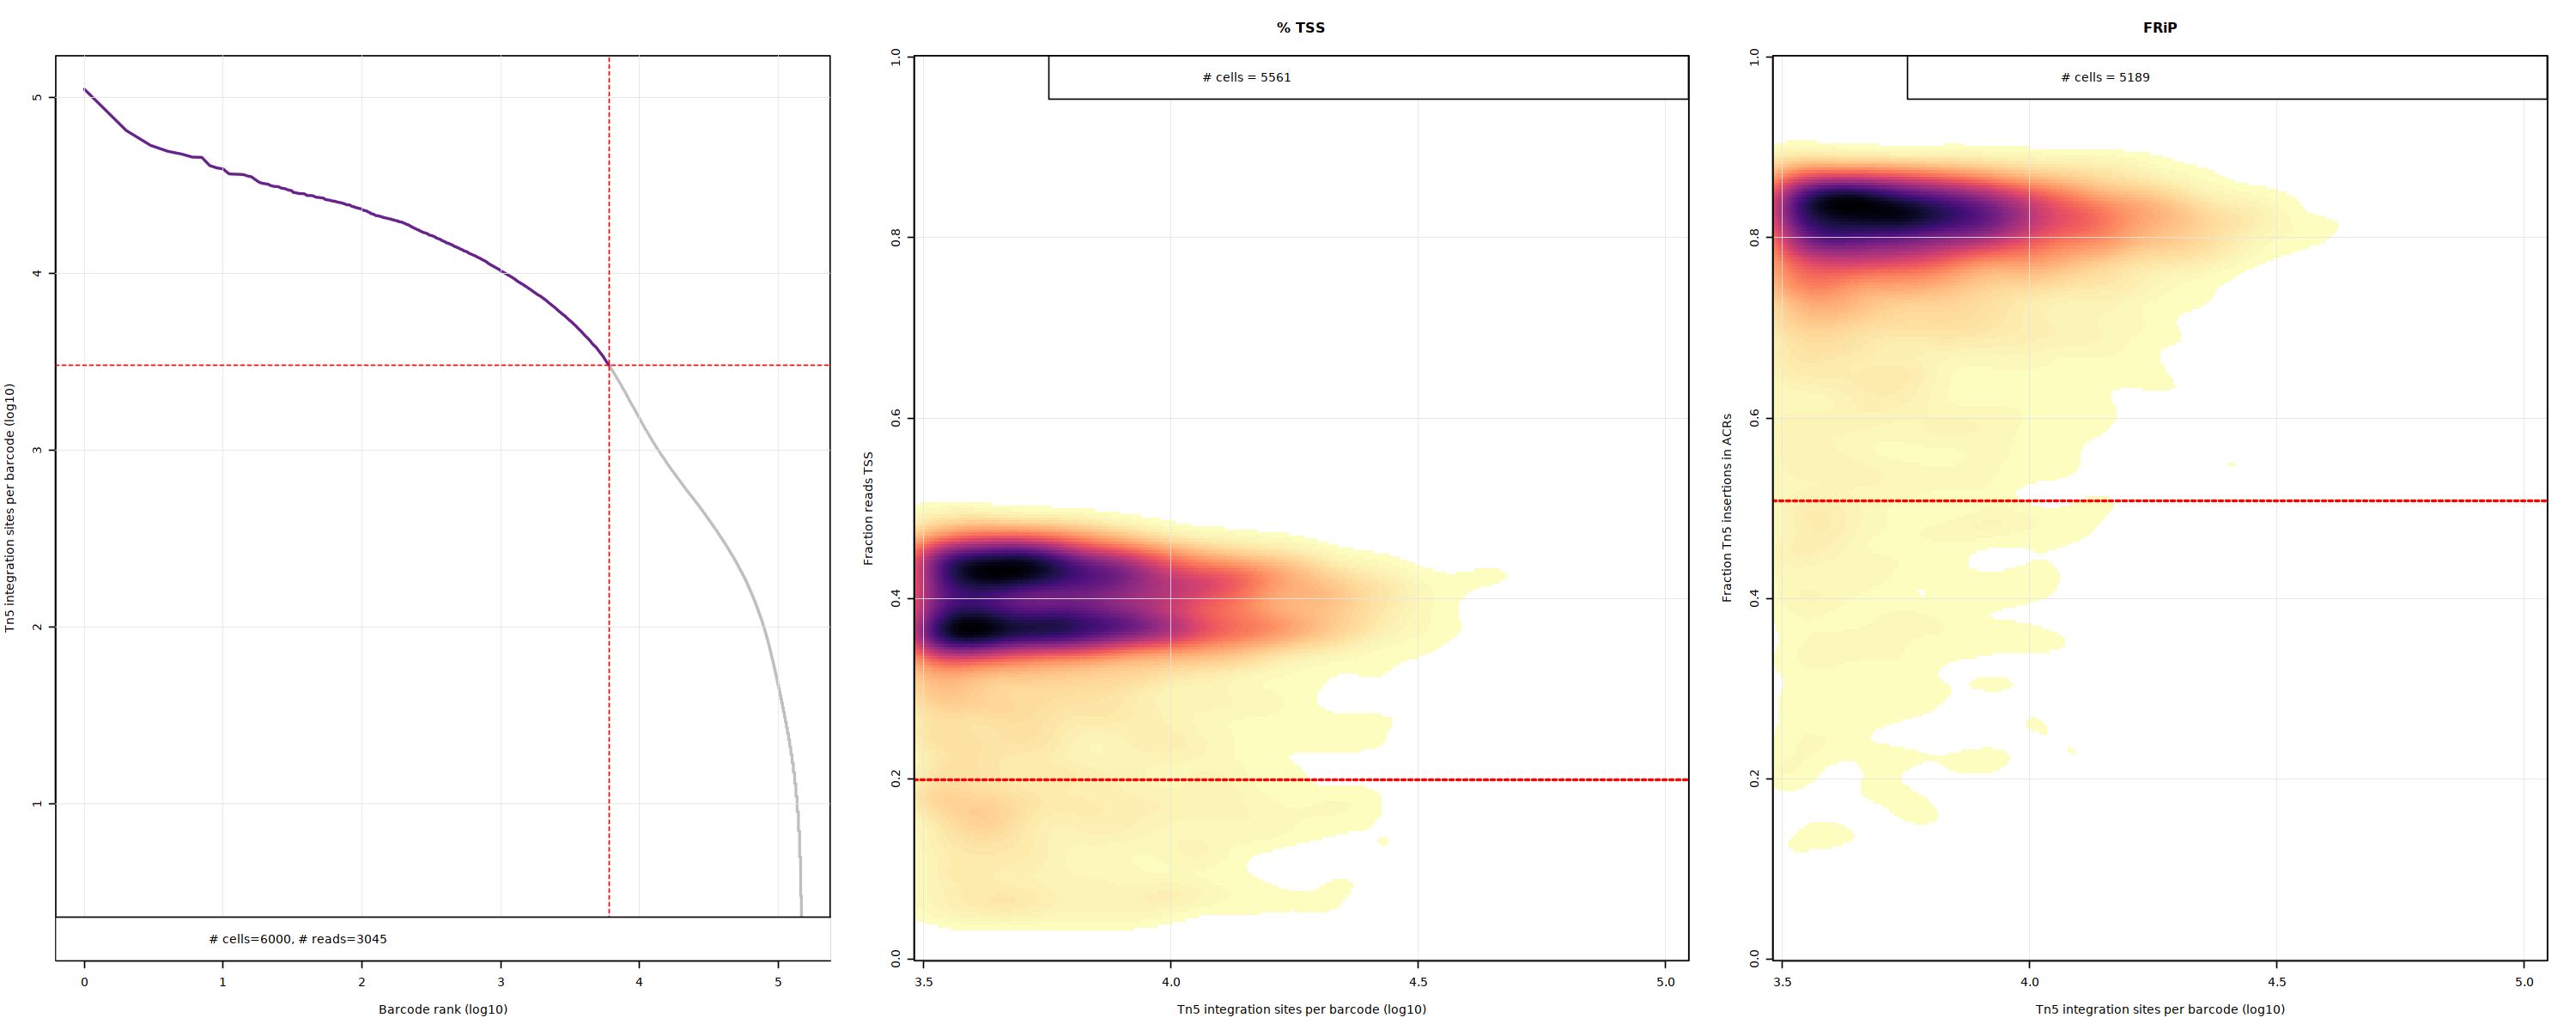

In [22]:

options(repr.plot.width=25, repr.plot.height=10)
Uro_P1.leaf.rep1.meta_file <- findCells(Uro_P1.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=6000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=NULL)


In [23]:
library(repr)
output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/Zm_Proso/"
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/Zm_Proso/QC_output/imgs/"

options(repr.plot.width=25, repr.plot.height=10)
Uro_P1.leaf.rep1.meta_file <- findCells(Uro_P1.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=6000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=paste0(output_path_imgs, pre))


Making Dotplot



In [24]:
# generate sparse matrix
Uro_P1.leaf.rep1.meta_file.filtered <- generateMatrix(Uro_P1.leaf.rep1.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            verbose=T)

#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

In [25]:


# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Uro_P1.leaf.rep1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Uro_P1.leaf.rep1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)

 - converting triplet format to sparseMatrix

